In [ ]:
! pip install inferactively-pymdp

## **Imports some helpful libraries, most importantly `numpy` and `pymdp`**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymdp
from pymdp import utils

### Let's set up the dimensionalities of the hidden state factors and the control states for 1 spider spinning a web in a grid

In [152]:
# Define the size of the grid. This is how we define the size of the environment and take observations/action per cell.
grid_size = 10

# Define the state space in the generative model. Cues from ActInf Modelstream #007.2
num_states = [grid_size, grid_size, 2]  # [number of x-coordinates(0-9) = 10, number of y-coordinates(0-9) = 10, web state(web, no web )]
num_factors = len(num_states)  # The number of factors in the generative model = 3

# Define the number of controls for each factor for the Agent: Spider
num_controls = [3, 3, 2]  # [number of x-movements (move left, move right, stay), number of y-movements (move up, move down, stay), web-spinning action (spin web, don't spin web)]
num_controls_factors = len(num_controls)  # The number of control factors in the generative model = 3


In [153]:
""" Build an object array for storing the factor-specific B matrices """
B = utils.initialize_empty_B(num_states, num_controls)

In [154]:
B[2].shape

(2, 2, 2)

### *Solution*

In [155]:
B = utils.initialize_empty_B(num_states, num_controls)
B[2]
#B[0] :x-coordinate, B[1]  :y-cordinate, B[2]  maps :spin web or don't spin web control factors of the Agent

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [156]:
# Initialize the B matrices (transition matrices)
B = utils.initialize_empty_B(num_states, num_controls)

# Loop over each factor (x and y coordinates, and web state)
for f, num_state in enumerate(num_states):

    if f < 2:  # x and y coordinates
        # MOVE LEFT (or UP)
        # For all states from 1 to num_state-1, set the transition probability to 1 for moving to the previous state (left or up)
        B[f][range(num_state-1), range(1, num_state), 0] = 1.0
        # If the spider is already at the leftmost state (state 0 for x) or topmost state (state 0 for y), it stays in state 0
        B[f][0, 0, 0] = 1.0

        # MOVE RIGHT (or DOWN)
        # For all states from 0 to num_state-2, set the transition probability to 1 for moving to the next state (right or down)
        B[f][range(1, num_state), range(num_state-1), 1] = 1.0
        # If the spider is already at the rightmost state (state num_state-1 for x) or bottommost state (state num_state-1 for y), it stays in state num_state-1
        B[f][num_state-1, num_state-1, 1] = 1.0

        # STAY
        # For all states from 0 to num_state-1, set the transition probability to 1 for staying in the same state
        B[f][range(num_state), range(num_state), 2] = 1.0
    else:  # web state
        # DON'T SPIN WEB
        # Regardless of the current state, set the transition probability to 1 for staying in the 'no web' state
        B[f][0, :, 0] = 1.0

        # SPIN WEB
        # Regardless of the current state, set the transition probability to 1 for transitioning to the 'web' state
        B[f][1, :, 1] = 1.0

### Plot the B matrix

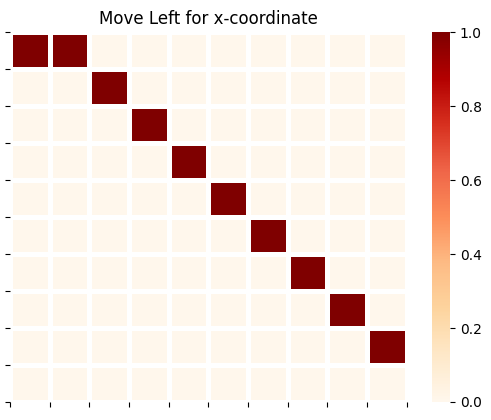

In [157]:
# Test for staying
utils.plot_likelihood(B[0][:,:,0], title="Move Left for x-coordinate")

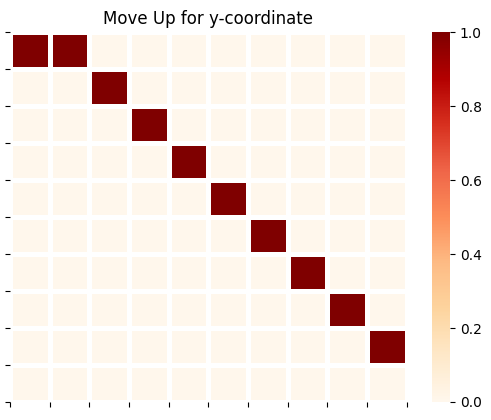

In [158]:
utils.plot_likelihood(B[1][:,:,0], title="Move Up for y-coordinate")

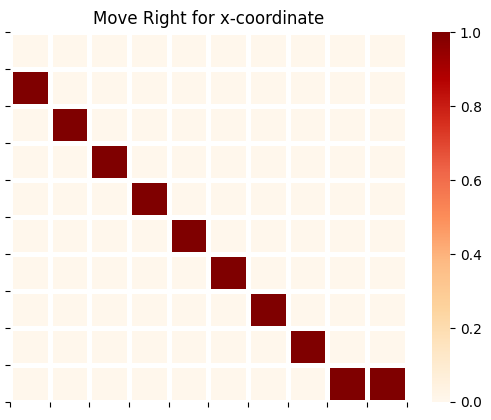

In [159]:
utils.plot_likelihood(B[0][:,:,1], title="Move Right for x-coordinate")

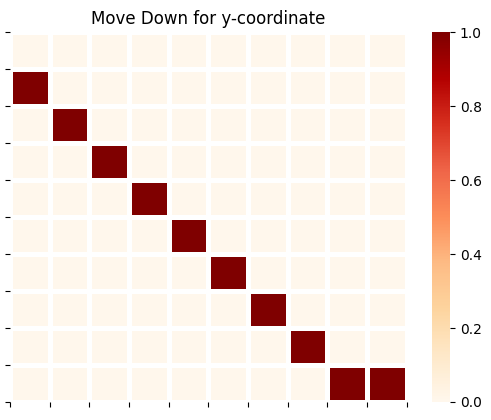

In [160]:
utils.plot_likelihood(B[1][:,:,1], title="Move Down for y-coordinate")

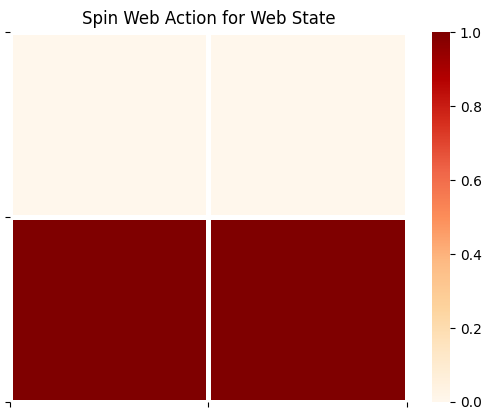

In [161]:
utils.plot_likelihood(B[2][:,:,1], title="Spin Web Action for Web State")

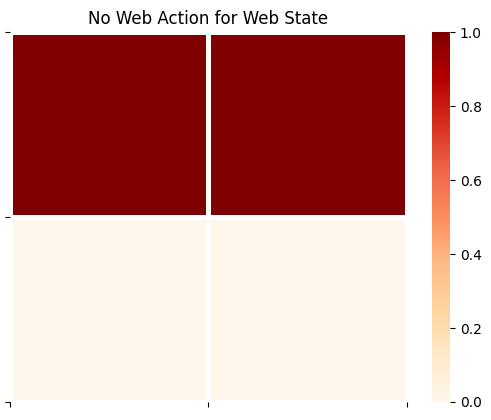

In [162]:
utils.plot_likelihood(B[2][:,:,0], title="No Web Action for Web State")

In [163]:
# Define the number of possible observations for each observation modality
num_observations = [num_states[0], num_states[1], num_states[2]]  # 10 observations for x, 10 for y, 2 for web

In [164]:
# Initialize the A matrix (observation likelihoods)
A = utils.initialize_empty_A(num_observations, num_states)

In [165]:
# The spider observes its own state with perfect accuracy
for f, num_state in enumerate(num_states):
  # For each factor, the observation likelihoods are represented by an identity matrix
  A[f] = np.eye(num_state)

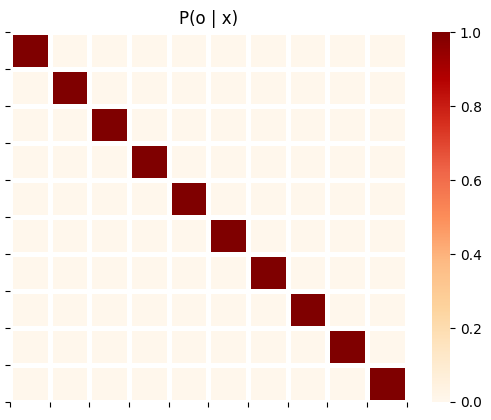

In [166]:
# Plot observation likelihoods for x coordinate
utils.plot_likelihood(A[0], title = "P(o | x)")

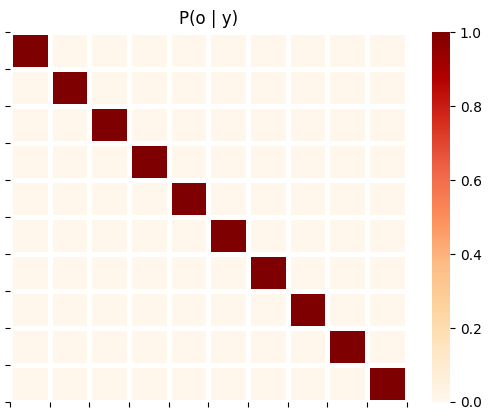

In [167]:
# Plot observation likelihoods for y coordinate
utils.plot_likelihood(A[1], title = "P(o | y)")

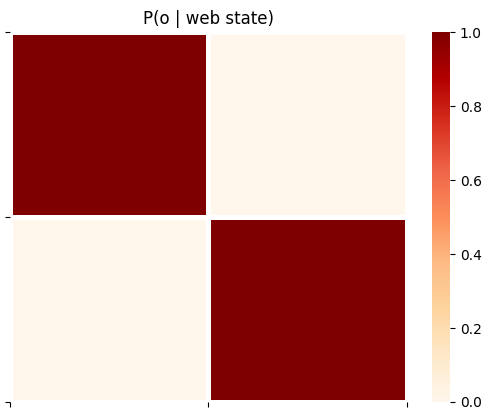

In [168]:
# Plot observation likelihoods for web state
utils.plot_likelihood(A[2], title = "P(o | web state)")

In [ ]:
# Initialize the C matrix (preferences)
C = utils.initialize_empty_C(num_states)

# The spider prefers to be on a web and in the center of the grid
C[0][5] = 1.0  # Preference for x = 5
C[1][5] = 1.0  # Preference for y = 5
C[2][1] = 1.0  # Preference for web state = 1 (on a web)

In [ ]:
# Initialize the D matrix (prior beliefs)
D = utils.initialize_empty_D(num_states)

# The spider initially believes it's not on a web and in the center of the grid
D[0][0] = 1.0  # Initial belief for x = 5
D[1][0] = 1.0  # Initial belief for y = 5
D[2][0] = 1.0  # Initial belief for web state = 0 (not on a web)


In [ ]:
my_agent = Agent(A=A, B=B, C=C, D=D)